In [22]:
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pymks
import pandas as pd
import os
from Scripts import velocityCalculations as vel
from Scripts import hoshenKopleman as hosh
import math
import time
from numpy import linalg as LA
from Scripts import plots

# Show image and progression

--- 4.414048910140991 seconds ---


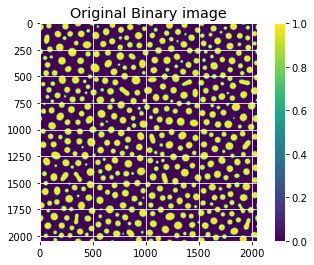

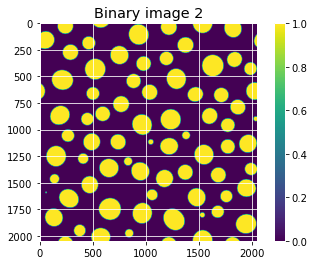

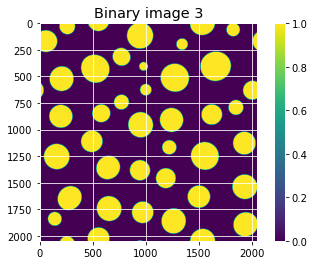

In [5]:
path = '/home/sushil/Desktop/adithya/ISOTROPIC/C03/'
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)
   
start_time = time.time()
img_ = corr.dat_to_numpy(list_files[30])
img_ = vel.gaussian_filter(img_,4)
img_ = (img_>0.5)*1
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(img_)
plt.colorbar()
plt.title('Original Binary image')
plt.show()


img_1 = corr.dat_to_numpy(list_files[700])
img_1 = vel.gaussian_filter(img_1,4)
img_1 = (img_1>0.5)*1
plt.imshow(img_1)
plt.colorbar()
plt.title('Binary image 2')
plt.show()

img_2 = corr.dat_to_numpy(list_files[1900])
img_2 = vel.gaussian_filter(img_2,4)
img_2 = (img_2>0.5)*1
plt.imshow(img_2)
plt.colorbar()
plt.title('Binary image 3')
plt.show()


In [6]:
len(list_files)

2000

# 2 point statistics

white-white


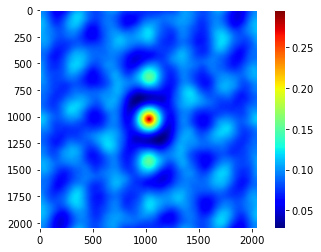

black-black


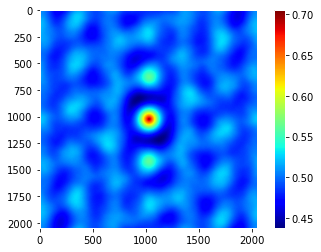

black-white


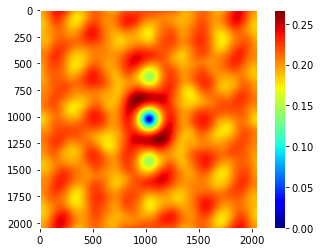

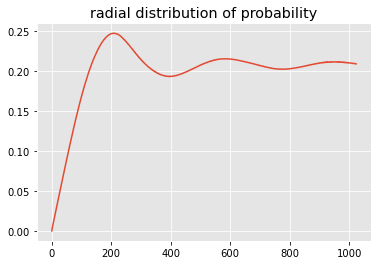

In [7]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_2)
print('white-white')
plt.imshow(white_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

print('black-black')
plt.imshow(black_stats, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

# Cross Correlations

cross = corr.cross_corr_from_code(img_2)
print('black-white')
plt.imshow(cross, cmap='jet')
plt.colorbar()
plt.grid(b=None)
plt.show()

#radial
r_val =corr.radialDistribution(cross)
plt.plot(r_val)
plt.title("radial distribution of probability")
plt.show()


# Velocity acc to level set methods, and further plots

In [45]:
start = time.time()
velocity = vel.velocityMagnitude(list_files, 1900, 3)
print(start-time.time())
velocity1 = vel.velocityDirection(list_files, 1900, 3)

print('Calculated Velocity')


-37.19013333320618
Calculated Velocity


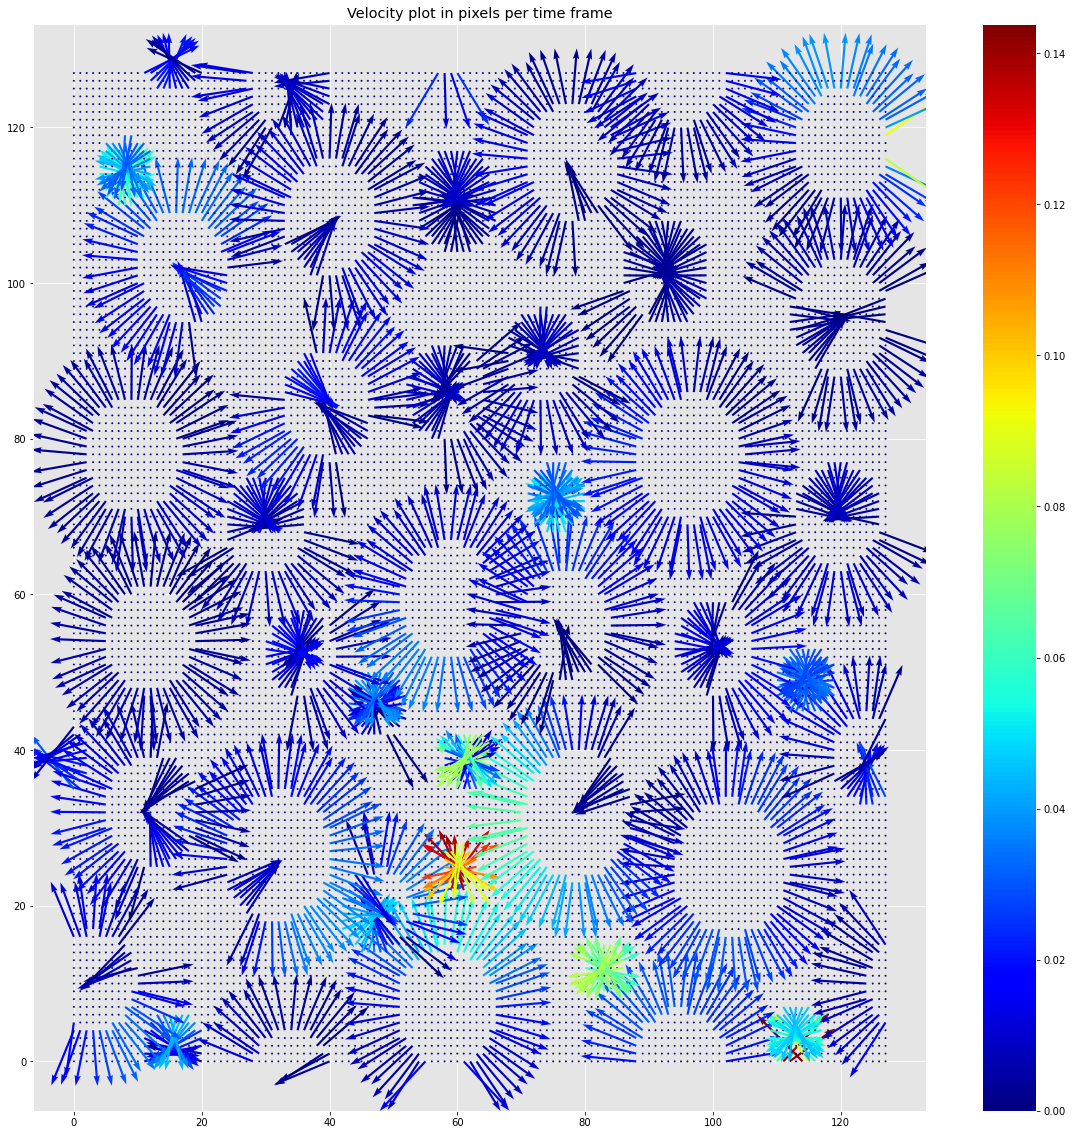

In [47]:
x = np.zeros((128,128))
y = np.zeros((128,128))
M = np.zeros((128,128))           
for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            x[i][j] = np.min(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            x[i][j] = np.max(velocity1[0][i*16:(i+1)*16,j*16:(j+1)*16])
        if np.max(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            y[i][j] = np.min(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            y[i][j] = np.max(velocity1[1][i*16:(i+1)*16,j*16:(j+1)*16])   


for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity[i*16:(i+1)*16,j*16:(j+1)*16])==0.0:
            M[i][j] = np.min(velocity[i*16:(i+1)*16,j*16:(j+1)*16])
        else:
            M[i][j] = np.max(velocity[i*16:(i+1)*16,j*16:(j+1)*16])


y = y*np.sign(M)
x = x*np.sign(M)
Fx = y
Fy = x
x_ = np.arange(0,128)
y_ = np.arange(0,128)
        
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.rcParams["figure.figsize"] = (20,20)
qq =plt.quiver(X, Y, Fx, Fy,np.abs(M),scale = 16,cmap=plt.cm.jet)
plt.colorbar(qq,cmap=plt.cm.jet)
plt.title('Velocity plot in pixels per time frame')
plt.show()

# Hoshen Kopleman plots

16.527083158493042  seconds
total number of ppts : 70


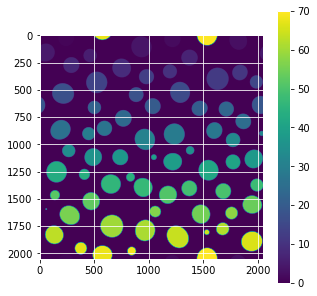

In [8]:
img_1 = corr.dat_to_numpy(list_files[700])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1
start= time.time()
labels = hosh.hoshenKoplemanLabels(img_1)
print(time.time()-start, ' seconds')
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels)
plt.colorbar()
print('total number of ppts :', np.max(labels))

Text(0.5, 1.0, 'Size Distribution')

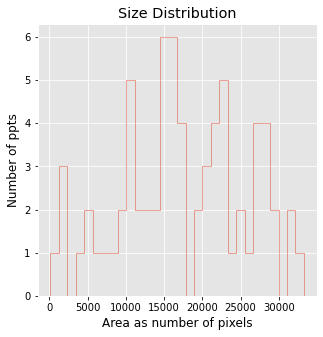

In [9]:
h =plt.hist(hosh.areaDistribution(labels), bins= 30,histtype=u'step')
plt.xlabel('Area as number of pixels')
plt.ylabel('Number of ppts')
plt.title('Size Distribution')

# Choosing ppt 1  and verifying calculations

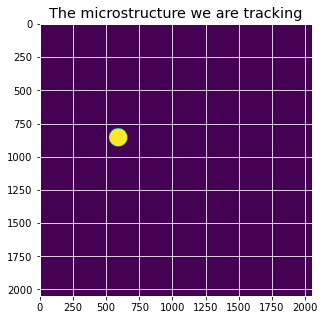

In [13]:
theChosenOne = 27
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels==theChosenOne)
plt.title('The microstructure we are tracking')
plt.show()

### Calculating Centre of mass for tracking

In [14]:
cog = hosh.precipitateCentres(labels,theChosenOne)
start= time.time()
theta, l, b, eig = hosh.findAngleMajorMinorEigenvector(labels,theChosenOne)
print('COG',cog)
print(theta,l, b, eig)
print(time.time()-start, ' seconds')

COG (853, 588)
-5.977978202824037 137.95802224787593 136.62015152572653 [[ 0.994562    0.10414621]
 [-0.10414621  0.994562  ]]
1.3177587985992432  seconds


In [15]:
img_1 = corr.dat_to_numpy(list_files[700])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1

img_2 = corr.dat_to_numpy(list_files[710])
img_2 = vel.gaussian_filter(img_2,5)
img_2 = (img_2>0.5)*1

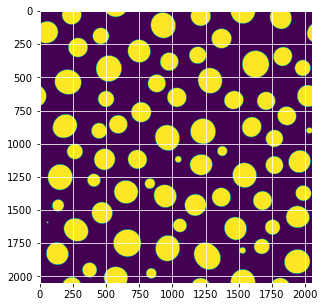

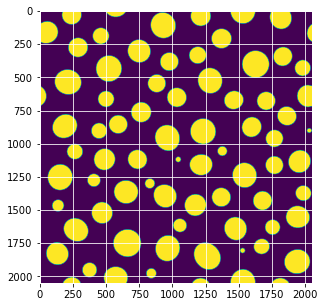

In [16]:
plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()

In [18]:
cog = hosh.precipitateCentres(labels,theChosenOne)
cog

(853, 588)

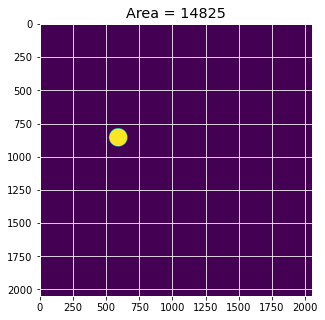

MicroStructure Number,  700
theta =  -7.593400631097583
l/b =  1.0091619128897813
time for  0  =  23.328136205673218
----------------------------------------------------------------------------


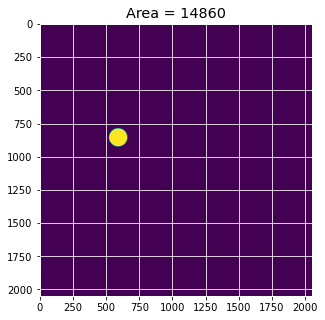

MicroStructure Number,  710
theta =  -8.086672320388383
l/b =  1.0098266556221063
time for  1  =  23.43297028541565
----------------------------------------------------------------------------


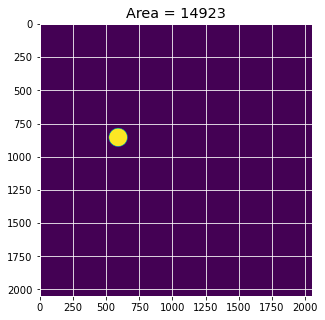

MicroStructure Number,  720
theta =  -8.184615105141305
l/b =  1.0109529632719054
time for  2  =  23.664031267166138
----------------------------------------------------------------------------


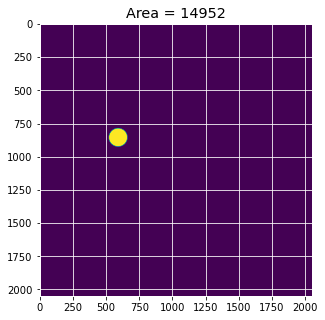

MicroStructure Number,  730
theta =  -12.635466521596468
l/b =  1.0112102474427194
time for  3  =  23.35073161125183
----------------------------------------------------------------------------


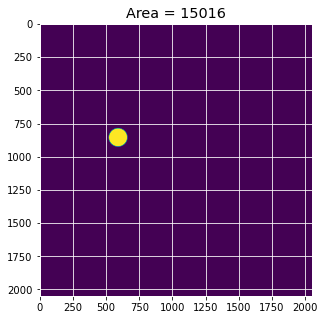

MicroStructure Number,  740
theta =  -11.404357378699856
l/b =  1.0127742129027213
time for  4  =  23.53558039665222
----------------------------------------------------------------------------


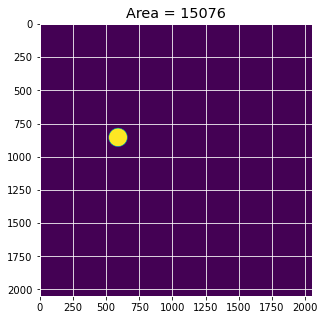

MicroStructure Number,  750
theta =  -13.816486073149882
l/b =  1.013157784805599
time for  5  =  23.24334216117859
----------------------------------------------------------------------------


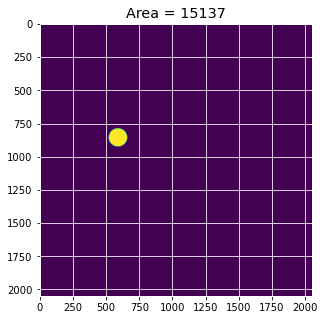

MicroStructure Number,  760
theta =  -11.175794548609975
l/b =  1.01453159674776
time for  6  =  23.576491355895996
----------------------------------------------------------------------------


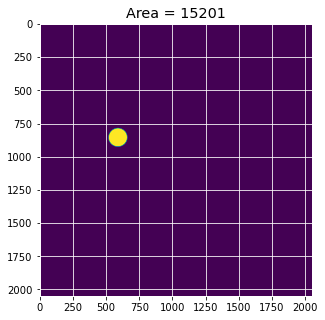

MicroStructure Number,  770
theta =  -11.814054687612185
l/b =  1.0145637481088599
time for  7  =  23.436593294143677
----------------------------------------------------------------------------


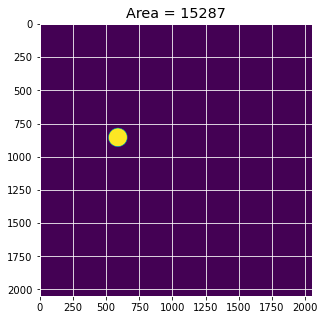

MicroStructure Number,  780
theta =  -13.03174217503576
l/b =  1.0146989249112714
time for  8  =  24.084276914596558
----------------------------------------------------------------------------


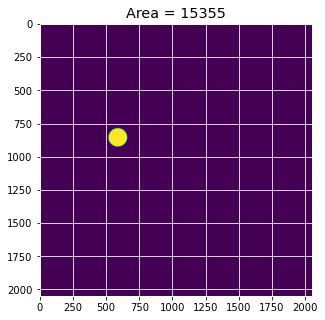

MicroStructure Number,  790
theta =  -13.455265798837312
l/b =  1.0160489052772343
time for  9  =  23.404028177261353
----------------------------------------------------------------------------


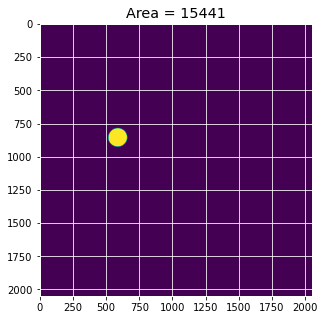

MicroStructure Number,  800
theta =  -14.581439105923323
l/b =  1.017626049387036
time for  10  =  23.42095422744751
----------------------------------------------------------------------------


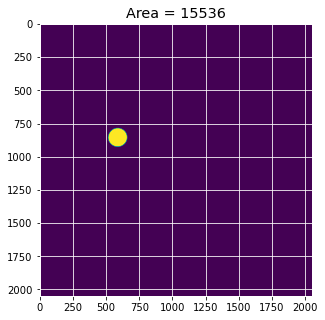

MicroStructure Number,  810
theta =  -14.97136305111713
l/b =  1.0194898130292827
time for  11  =  23.387651681900024
----------------------------------------------------------------------------


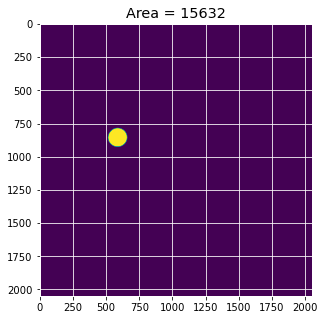

MicroStructure Number,  820
theta =  -14.1811378126506
l/b =  1.0204813945397162
time for  12  =  23.723562002182007
----------------------------------------------------------------------------


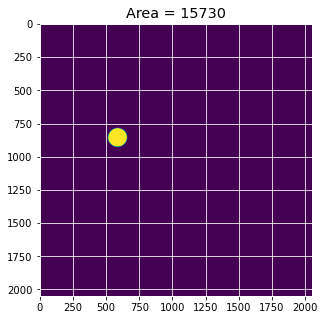

MicroStructure Number,  830
theta =  -14.53063042994517
l/b =  1.0198444763798087
time for  13  =  22.913097858428955
----------------------------------------------------------------------------


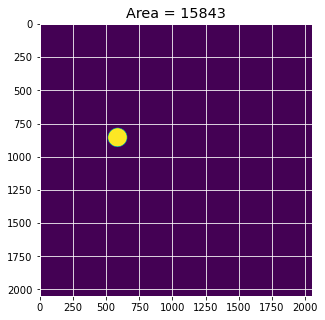

MicroStructure Number,  840
theta =  -13.911201988374364
l/b =  1.0216999647149165
time for  14  =  23.351681232452393
----------------------------------------------------------------------------


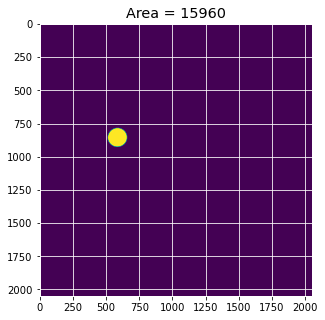

MicroStructure Number,  850
theta =  -13.530581432879105
l/b =  1.0232244423739751
time for  15  =  23.128770351409912
----------------------------------------------------------------------------


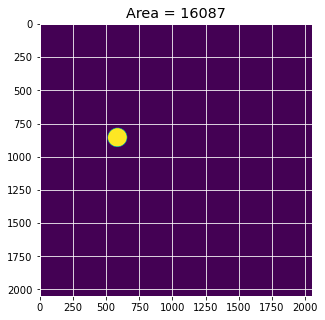

MicroStructure Number,  860
theta =  -13.675433967682103
l/b =  1.025636986106322
time for  16  =  23.131982803344727
----------------------------------------------------------------------------


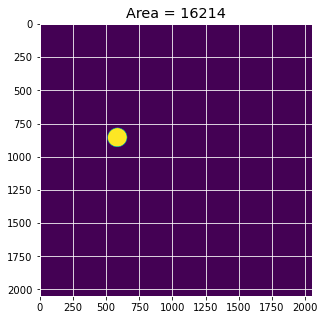

MicroStructure Number,  870
theta =  -14.507038977347728
l/b =  1.027083130836483
time for  17  =  23.29863715171814
----------------------------------------------------------------------------


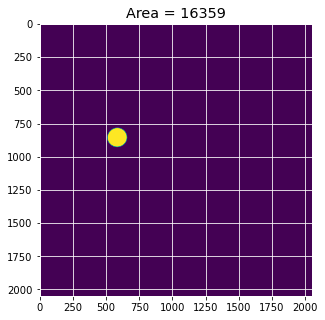

MicroStructure Number,  880
theta =  -15.397831248254569
l/b =  1.0276890841185562
time for  18  =  23.448256254196167
----------------------------------------------------------------------------


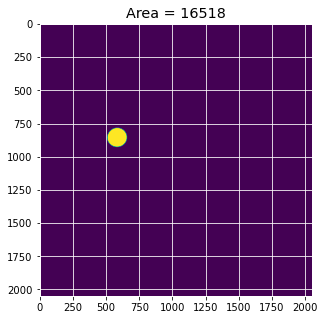

MicroStructure Number,  890
theta =  -16.25861785364406
l/b =  1.0291764265665575
time for  19  =  22.87533926963806
----------------------------------------------------------------------------


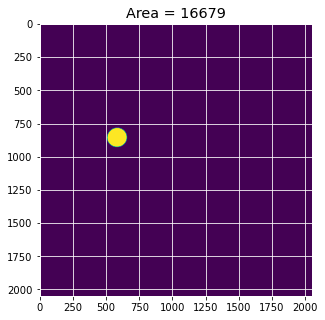

MicroStructure Number,  900
theta =  -15.133700875205832
l/b =  1.0325214978298776
time for  20  =  23.903174877166748
----------------------------------------------------------------------------


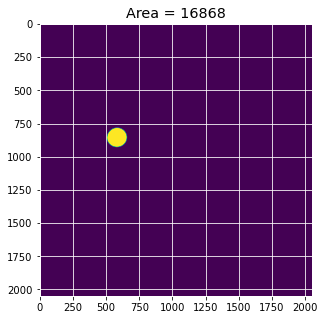

MicroStructure Number,  910
theta =  -15.357527815068808
l/b =  1.0335269353832843
time for  21  =  23.218871355056763
----------------------------------------------------------------------------


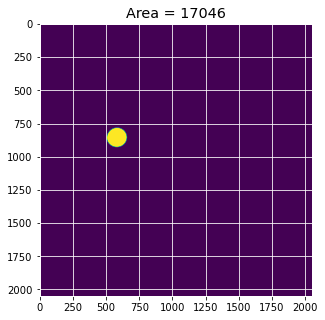

MicroStructure Number,  920
theta =  -14.889290522983153
l/b =  1.0353357884094916
time for  22  =  22.90078854560852
----------------------------------------------------------------------------


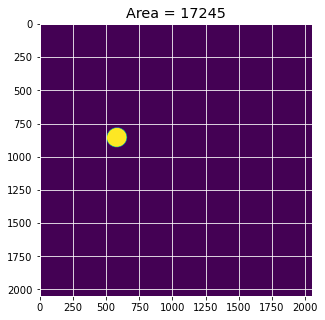

MicroStructure Number,  930
theta =  -15.005741685929104
l/b =  1.0391399488970872
time for  23  =  24.04190492630005
----------------------------------------------------------------------------


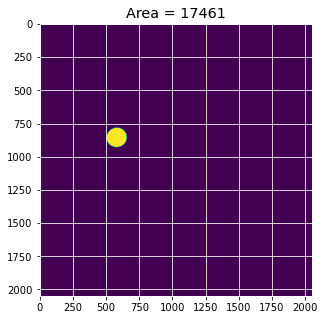

MicroStructure Number,  940
theta =  -15.809795679401589
l/b =  1.039447517565588
time for  24  =  23.79183077812195
----------------------------------------------------------------------------


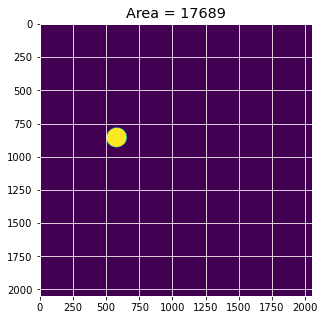

MicroStructure Number,  950
theta =  -15.747035706406662
l/b =  1.0440972380099611
time for  25  =  23.003364086151123
----------------------------------------------------------------------------


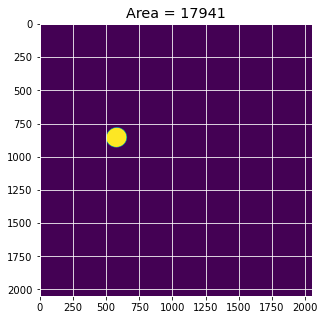

MicroStructure Number,  960
theta =  -15.680144287748842
l/b =  1.0474096952469993
time for  26  =  22.905585527420044
----------------------------------------------------------------------------


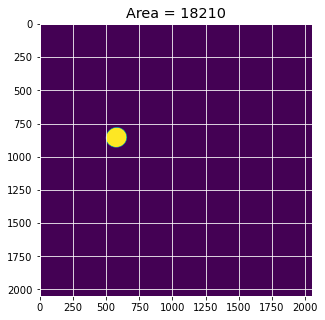

MicroStructure Number,  970
theta =  -16.26520233209122
l/b =  1.0513898363811758
time for  27  =  23.248478889465332
----------------------------------------------------------------------------


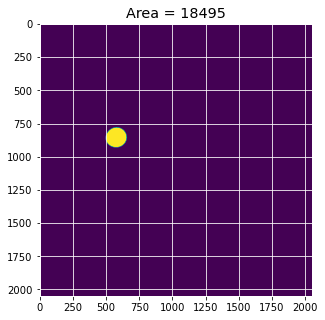

MicroStructure Number,  980
theta =  -15.8876946731837
l/b =  1.055364686290859
time for  28  =  23.013567447662354
----------------------------------------------------------------------------


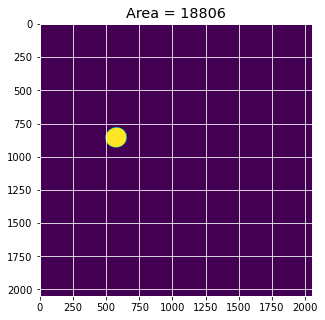

MicroStructure Number,  990
theta =  -16.246552173253704
l/b =  1.0598384306907722
time for  29  =  23.31491494178772
----------------------------------------------------------------------------


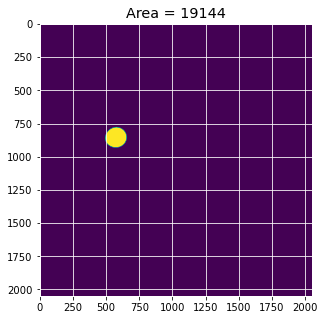

MicroStructure Number,  1000
theta =  -16.232946850635425
l/b =  1.0654577901420892
time for  30  =  23.018154621124268
----------------------------------------------------------------------------


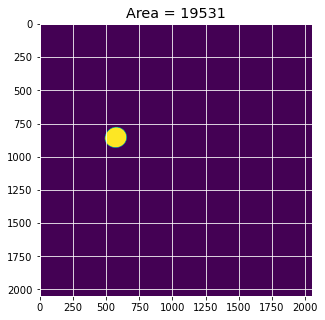

MicroStructure Number,  1010
theta =  -16.239641124641302
l/b =  1.0718629360012983
time for  31  =  22.997344255447388
----------------------------------------------------------------------------


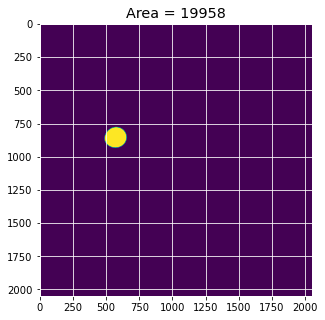

MicroStructure Number,  1020
theta =  -16.544872399889993
l/b =  1.0803734946460855
time for  32  =  23.246915102005005
----------------------------------------------------------------------------


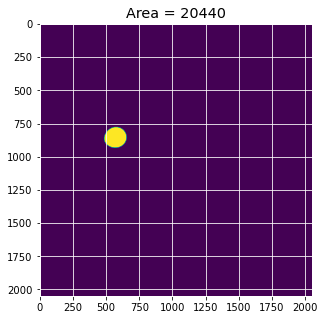

MicroStructure Number,  1030
theta =  -16.42280406593071
l/b =  1.0927382879728746
time for  33  =  24.283810138702393
----------------------------------------------------------------------------


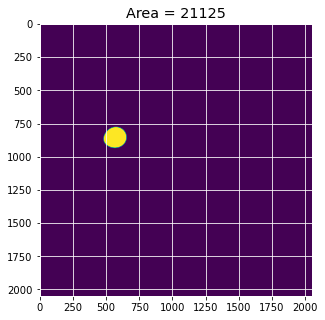

MicroStructure Number,  1040
theta =  -17.10832632708254
l/b =  1.1147154325608102
time for  34  =  23.175180196762085
----------------------------------------------------------------------------


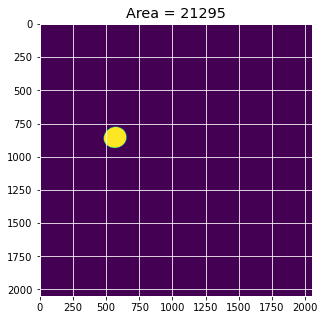

MicroStructure Number,  1050
theta =  -16.730526165619132
l/b =  1.0964607460647526
time for  35  =  23.023182153701782
----------------------------------------------------------------------------


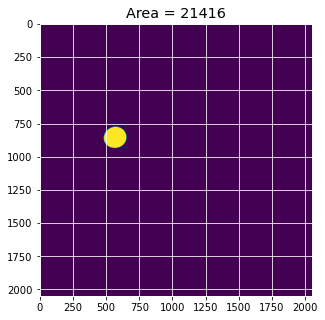

MicroStructure Number,  1060
theta =  -15.852253089676713
l/b =  1.078924748469845
time for  36  =  23.24625039100647
----------------------------------------------------------------------------


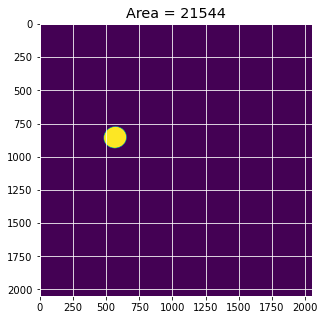

MicroStructure Number,  1070
theta =  -15.352237291204903
l/b =  1.0624230220342128
time for  37  =  23.866810083389282
----------------------------------------------------------------------------


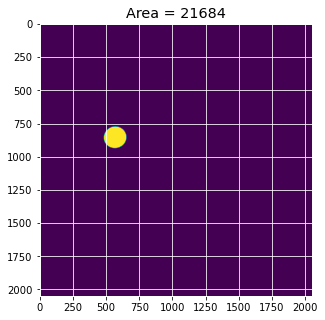

MicroStructure Number,  1080
theta =  -14.221192005726563
l/b =  1.0477827331733063
time for  38  =  23.563482999801636
----------------------------------------------------------------------------


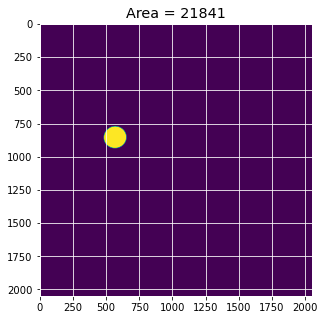

MicroStructure Number,  1090
theta =  -12.010479128527406
l/b =  1.0345576564470633
time for  39  =  24.167524337768555
----------------------------------------------------------------------------


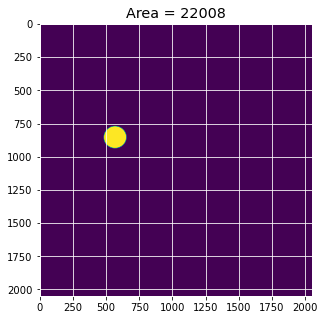

MicroStructure Number,  1100
theta =  -7.40138918313464
l/b =  1.0231987787509038
time for  40  =  23.33619475364685
----------------------------------------------------------------------------


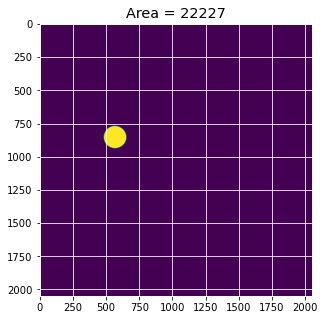

MicroStructure Number,  1110
theta =  2.174124325345761
l/b =  1.0133973683448199
time for  41  =  24.21680498123169
----------------------------------------------------------------------------


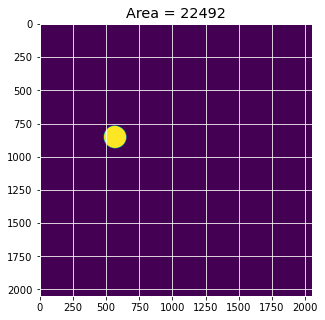

MicroStructure Number,  1120
theta =  38.60578502857418
l/b =  1.0104689501717528
time for  42  =  23.216805934906006
----------------------------------------------------------------------------


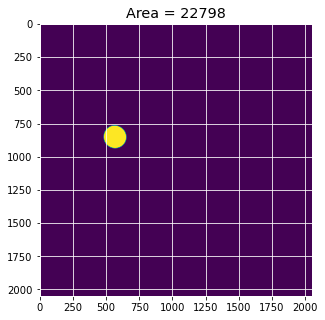

MicroStructure Number,  1130
theta =  -36.73089225612506
l/b =  1.0196974104498648
time for  43  =  23.578559160232544
----------------------------------------------------------------------------


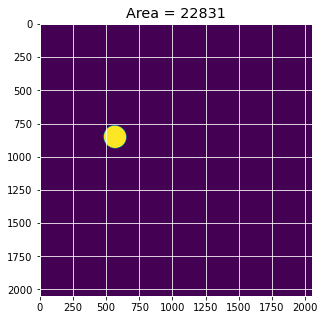

MicroStructure Number,  1140
theta =  -36.88832143378674
l/b =  1.0182383189878816
time for  44  =  23.66911005973816
----------------------------------------------------------------------------


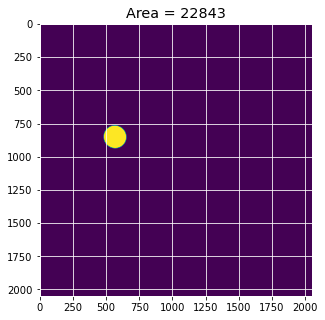

MicroStructure Number,  1150
theta =  -37.29509251854882
l/b =  1.016416106736322
time for  45  =  23.350337266921997
----------------------------------------------------------------------------


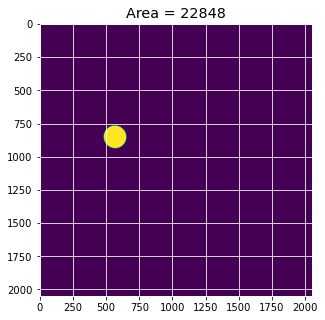

MicroStructure Number,  1160
theta =  -37.63148660510021
l/b =  1.014290689233108
time for  46  =  23.313945055007935
----------------------------------------------------------------------------


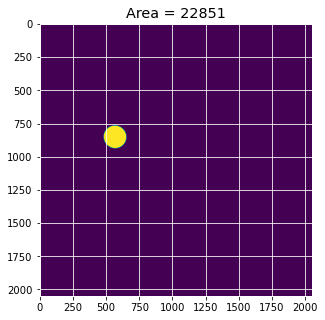

MicroStructure Number,  1170
theta =  -37.67840322689544
l/b =  1.0124758658101654
time for  47  =  22.943334341049194
----------------------------------------------------------------------------


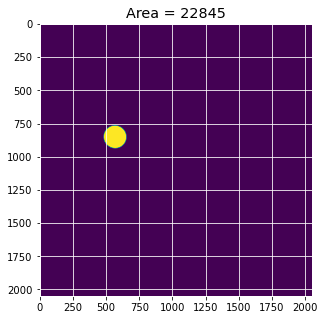

MicroStructure Number,  1180
theta =  -37.875261110860315
l/b =  1.0105122055000986
time for  48  =  23.735525131225586
----------------------------------------------------------------------------


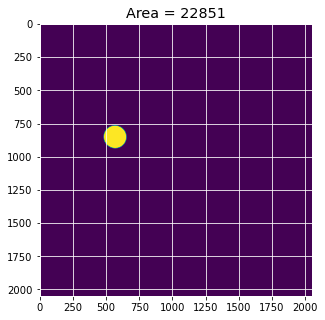

MicroStructure Number,  1190
theta =  -41.475451424666964
l/b =  1.0099574624527818
time for  49  =  23.540404796600342
----------------------------------------------------------------------------


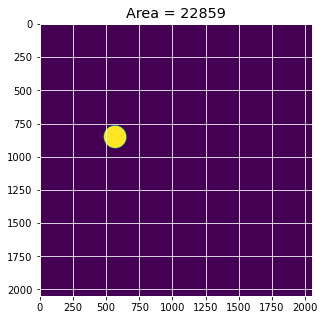

MicroStructure Number,  1200
theta =  -43.280516430259006
l/b =  1.0089183778875361
time for  50  =  24.103354454040527
----------------------------------------------------------------------------


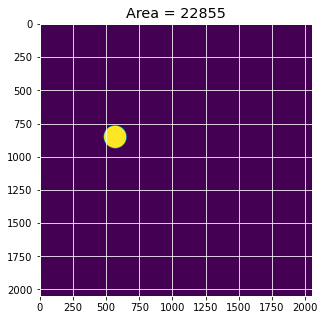

MicroStructure Number,  1210
theta =  -44.472848184957904
l/b =  1.0078698567711257
time for  51  =  24.21743416786194
----------------------------------------------------------------------------


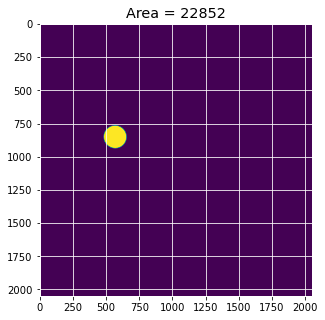

MicroStructure Number,  1220
theta =  42.11364076460941
l/b =  1.0065878766058105
time for  52  =  23.288825273513794
----------------------------------------------------------------------------


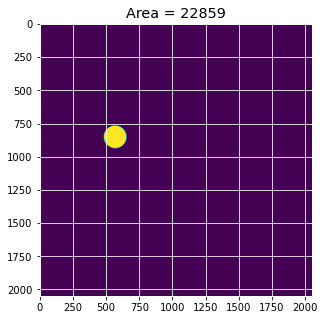

MicroStructure Number,  1230
theta =  44.26751366351437
l/b =  1.0062250352472981
time for  53  =  22.805214881896973
----------------------------------------------------------------------------


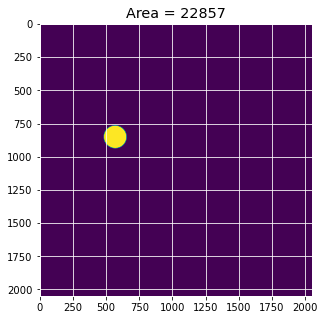

MicroStructure Number,  1240
theta =  42.14440691605741
l/b =  1.0058708098912759
time for  54  =  23.226370811462402
----------------------------------------------------------------------------


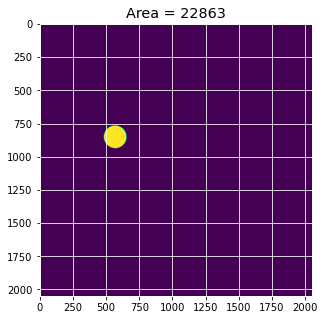

MicroStructure Number,  1250
theta =  39.29702463682247
l/b =  1.0051984771645865
time for  55  =  22.84971594810486
----------------------------------------------------------------------------


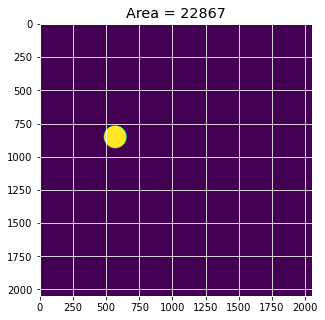

MicroStructure Number,  1260
theta =  30.46537582480457
l/b =  1.0043640359340307
time for  56  =  23.735670804977417
----------------------------------------------------------------------------


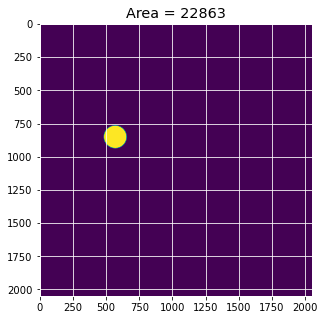

MicroStructure Number,  1270
theta =  23.429172359833327
l/b =  1.003860477579687
time for  57  =  23.441601753234863
----------------------------------------------------------------------------


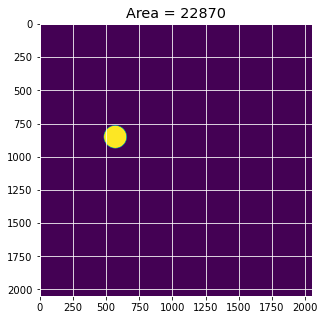

MicroStructure Number,  1280
theta =  22.31781991836524
l/b =  1.0038229796006028
time for  58  =  23.191723823547363
----------------------------------------------------------------------------


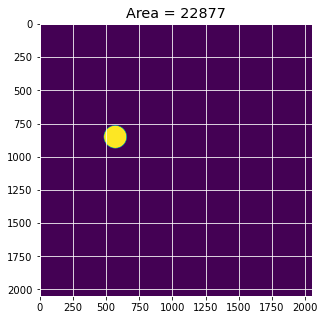

MicroStructure Number,  1290
theta =  24.61105234958232
l/b =  1.0041418671500257
time for  59  =  23.77696418762207
----------------------------------------------------------------------------


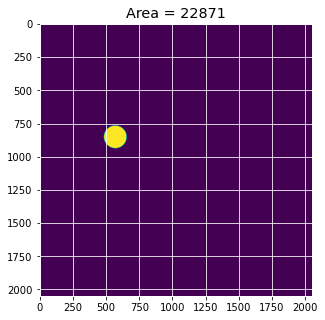

MicroStructure Number,  1300
theta =  26.675472193458283
l/b =  1.0043527245765878
time for  60  =  23.76967144012451
----------------------------------------------------------------------------


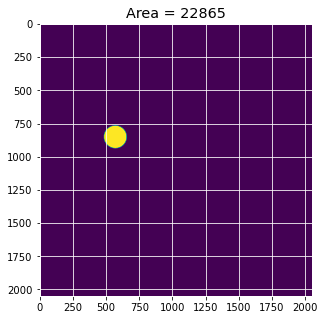

MicroStructure Number,  1310
theta =  27.144686570784575
l/b =  1.0039059728096598
time for  61  =  23.970571756362915
----------------------------------------------------------------------------


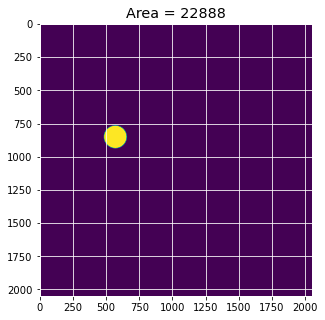

MicroStructure Number,  1320
theta =  16.135528594969795
l/b =  1.0040182489806488
time for  62  =  23.61113452911377
----------------------------------------------------------------------------


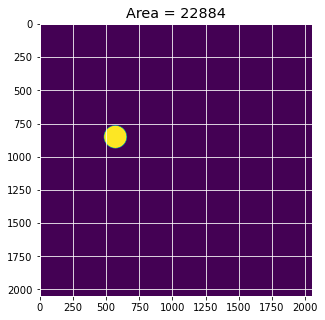

MicroStructure Number,  1330
theta =  9.276343294794039
l/b =  1.003706986811531
time for  63  =  23.10689640045166
----------------------------------------------------------------------------


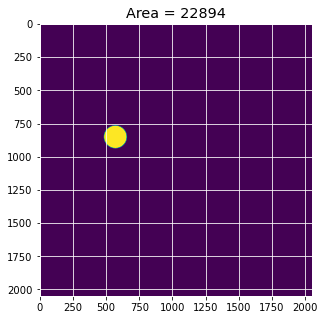

MicroStructure Number,  1340
theta =  11.697778917425099
l/b =  1.0046858605522884
time for  64  =  23.311466693878174
----------------------------------------------------------------------------


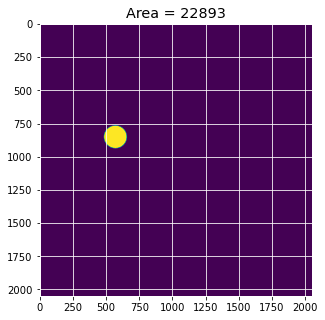

MicroStructure Number,  1350
theta =  12.571325299447318
l/b =  1.0044119718508637
time for  65  =  22.740878105163574
----------------------------------------------------------------------------


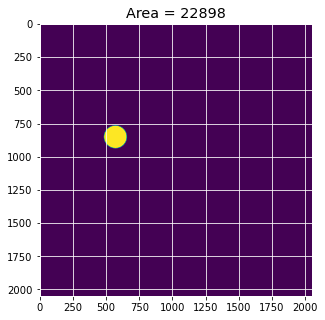

MicroStructure Number,  1360
theta =  13.367568859635709
l/b =  1.0045259950750363
time for  66  =  23.405347108840942
----------------------------------------------------------------------------


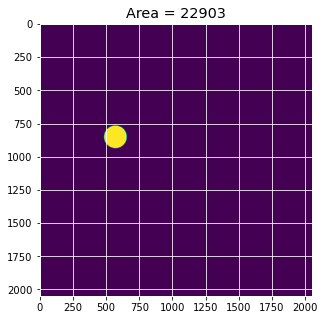

MicroStructure Number,  1370
theta =  12.57316699825811
l/b =  1.0044833339912882
time for  67  =  23.28563404083252
----------------------------------------------------------------------------


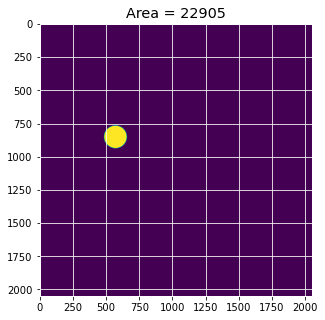

MicroStructure Number,  1380
theta =  10.271113640305002
l/b =  1.0046258526228697
time for  68  =  23.546888828277588
----------------------------------------------------------------------------


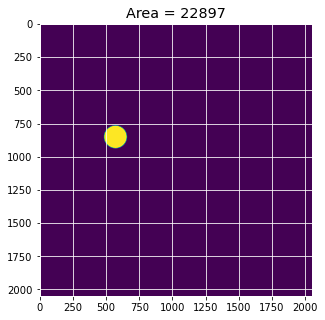

MicroStructure Number,  1390
theta =  5.61320248996279
l/b =  1.0047061031840825
time for  69  =  23.373326063156128
----------------------------------------------------------------------------


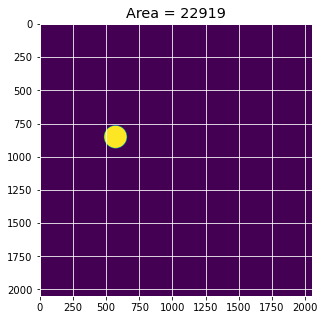

MicroStructure Number,  1400
theta =  7.574023635388165
l/b =  1.0047114678501237
time for  70  =  23.227815628051758
----------------------------------------------------------------------------


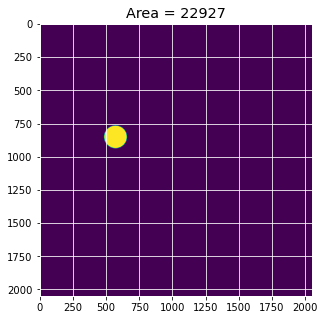

MicroStructure Number,  1410
theta =  12.639639312091825
l/b =  1.0049309493404543
time for  71  =  24.238563299179077
----------------------------------------------------------------------------


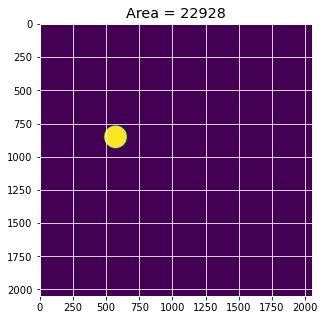

MicroStructure Number,  1420
theta =  10.855695532862724
l/b =  1.0049871048544066
time for  72  =  23.151789903640747
----------------------------------------------------------------------------


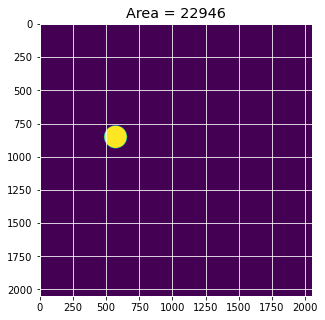

MicroStructure Number,  1430
theta =  6.899159495525216
l/b =  1.0053345094161152
time for  73  =  23.275299310684204
----------------------------------------------------------------------------


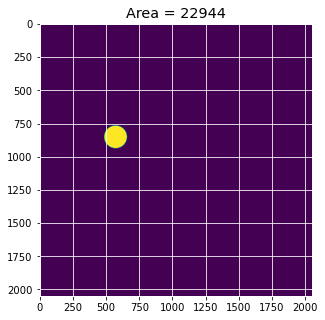

MicroStructure Number,  1440
theta =  6.786196320303249
l/b =  1.0050053838080328
time for  74  =  23.71271276473999
----------------------------------------------------------------------------


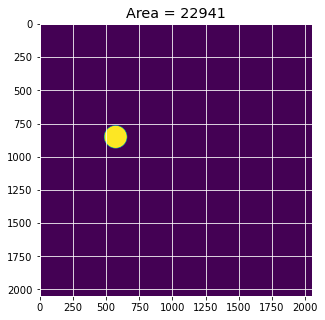

MicroStructure Number,  1450
theta =  8.29979240006047
l/b =  1.0051865546679886
time for  75  =  23.16934037208557
----------------------------------------------------------------------------


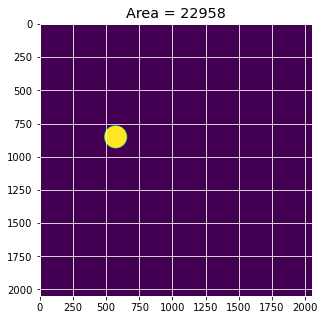

MicroStructure Number,  1460
theta =  12.044618861678547
l/b =  1.005508242528449
time for  76  =  23.28929591178894
----------------------------------------------------------------------------


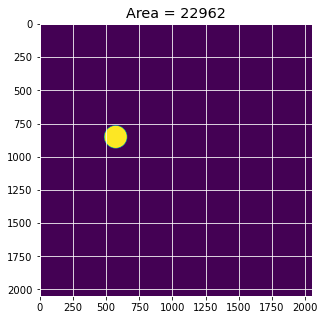

MicroStructure Number,  1470
theta =  11.968535294867298
l/b =  1.0057398529171757
time for  77  =  23.979322910308838
----------------------------------------------------------------------------


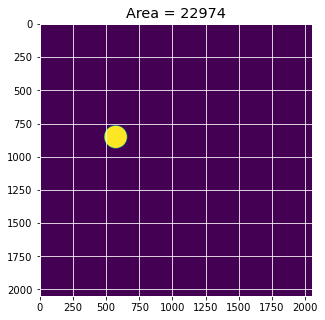

MicroStructure Number,  1480
theta =  12.336481978402434
l/b =  1.005959362845542
time for  78  =  23.63002371788025
----------------------------------------------------------------------------


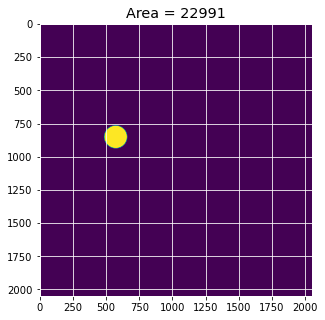

MicroStructure Number,  1490
theta =  8.320848707614694
l/b =  1.006155057087813
time for  79  =  23.510777950286865
----------------------------------------------------------------------------


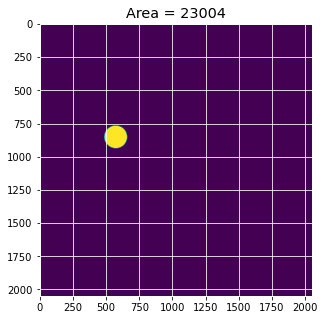

MicroStructure Number,  1500
theta =  11.514574240418161
l/b =  1.0063948053535878
time for  80  =  23.486632108688354
----------------------------------------------------------------------------


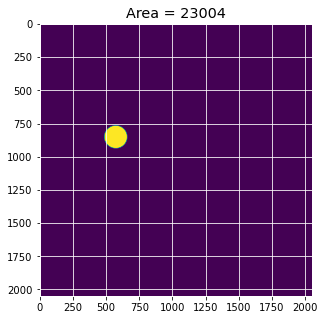

MicroStructure Number,  1510
theta =  12.934934490612141
l/b =  1.005911558462712
time for  81  =  23.660741567611694
----------------------------------------------------------------------------


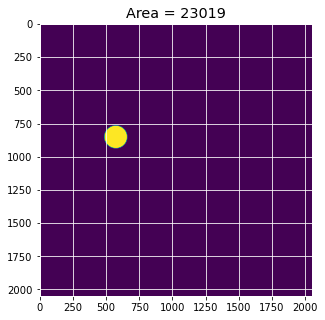

MicroStructure Number,  1520
theta =  15.801513452126644
l/b =  1.0063115415100672
time for  82  =  23.92036771774292
----------------------------------------------------------------------------


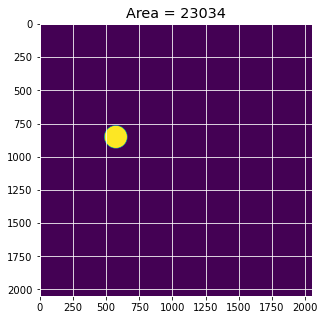

MicroStructure Number,  1530
theta =  16.97017979962083
l/b =  1.0073432305063956
time for  83  =  23.415045022964478
----------------------------------------------------------------------------


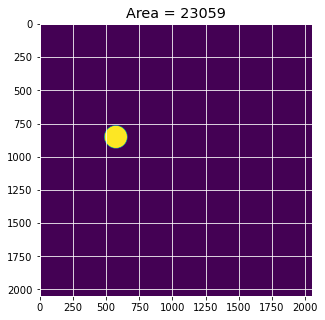

MicroStructure Number,  1540
theta =  18.271918369350423
l/b =  1.0081378130198195
time for  84  =  23.66297173500061
----------------------------------------------------------------------------


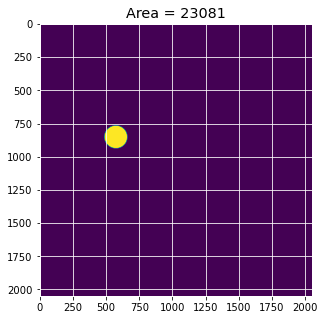

MicroStructure Number,  1550
theta =  18.213224273274925
l/b =  1.008222782203582
time for  85  =  24.111759424209595
----------------------------------------------------------------------------


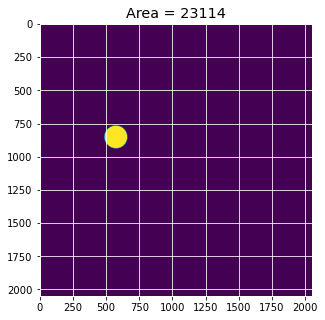

MicroStructure Number,  1560
theta =  23.95665598647509
l/b =  1.0077177775965493
time for  86  =  23.350858449935913
----------------------------------------------------------------------------


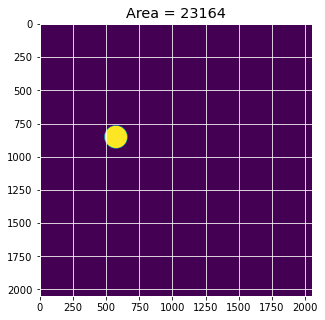

MicroStructure Number,  1570
theta =  29.011411359998856
l/b =  1.0086268716819113
time for  87  =  23.18036651611328
----------------------------------------------------------------------------


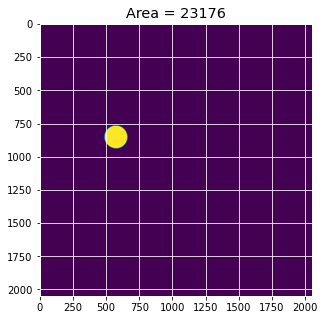

MicroStructure Number,  1580
theta =  27.65014937021674
l/b =  1.0096911386986602
time for  88  =  23.48490834236145
----------------------------------------------------------------------------


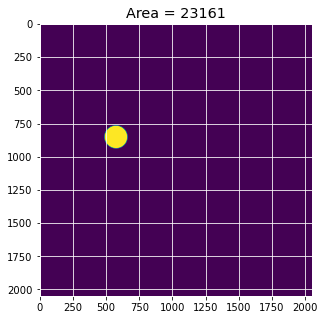

MicroStructure Number,  1590
theta =  22.871741424025053
l/b =  1.008082702319458
time for  89  =  23.188876628875732
----------------------------------------------------------------------------


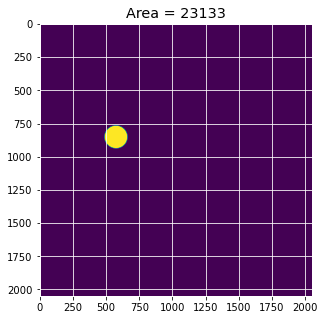

MicroStructure Number,  1600
theta =  15.819399381310669
l/b =  1.0074964117654146
time for  90  =  23.16658902168274
----------------------------------------------------------------------------


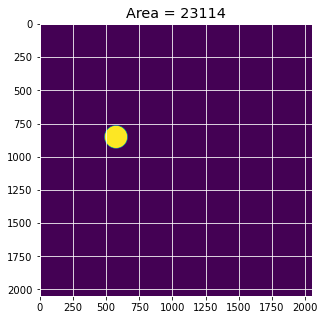

MicroStructure Number,  1610
theta =  10.6776682353804
l/b =  1.0073348528302766
time for  91  =  23.4024817943573
----------------------------------------------------------------------------


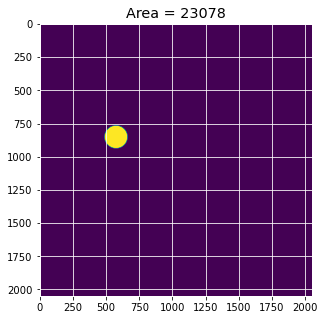

MicroStructure Number,  1620
theta =  3.8483497172776686
l/b =  1.0072104975939353
time for  92  =  23.54996919631958
----------------------------------------------------------------------------


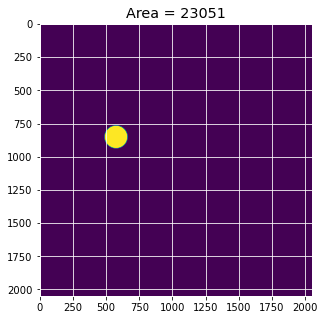

MicroStructure Number,  1630
theta =  1.6677067881315633
l/b =  1.0071772709035152
time for  93  =  23.382112503051758
----------------------------------------------------------------------------


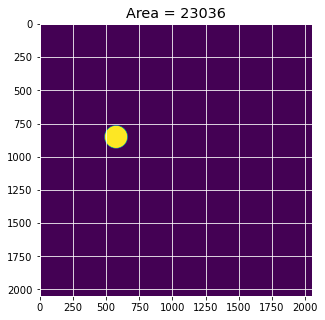

MicroStructure Number,  1640
theta =  -3.16171405317299
l/b =  1.007894175313568
time for  94  =  23.69868803024292
----------------------------------------------------------------------------


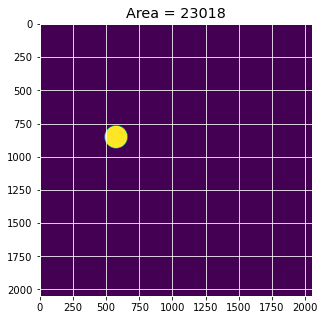

MicroStructure Number,  1650
theta =  -6.040128186196243
l/b =  1.0085471267082515
time for  95  =  23.40464448928833
----------------------------------------------------------------------------


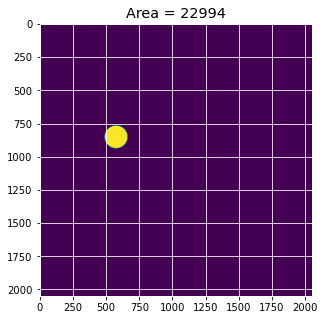

MicroStructure Number,  1660
theta =  -9.071015798072557
l/b =  1.0090885449237637
time for  96  =  24.00382423400879
----------------------------------------------------------------------------


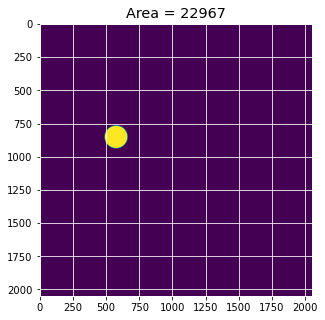

MicroStructure Number,  1670
theta =  -10.37701516735623
l/b =  1.0094294431624589
time for  97  =  23.85783362388611
----------------------------------------------------------------------------


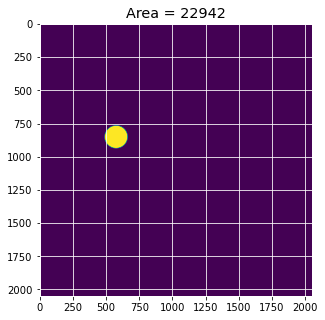

MicroStructure Number,  1680
theta =  -15.095827052269044
l/b =  1.0101486436973848
time for  98  =  23.78157925605774
----------------------------------------------------------------------------


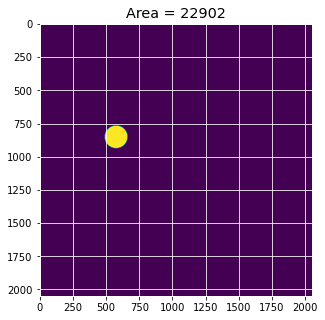

MicroStructure Number,  1690
theta =  -16.18976847780854
l/b =  1.0099631801113567
time for  99  =  25.37407350540161
----------------------------------------------------------------------------


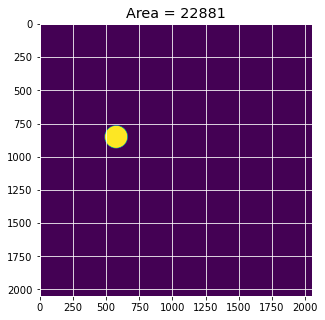

MicroStructure Number,  1700
theta =  -17.129781574456334
l/b =  1.0109561852554043
time for  100  =  23.673224210739136
----------------------------------------------------------------------------


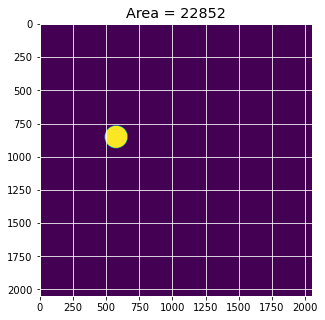

MicroStructure Number,  1710
theta =  -17.591288844728656
l/b =  1.0114950808476475
time for  101  =  24.201831817626953
----------------------------------------------------------------------------


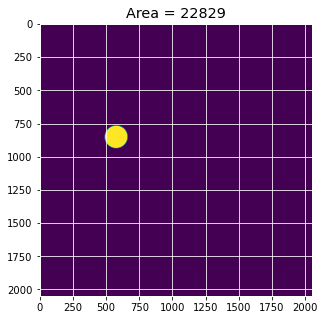

MicroStructure Number,  1720
theta =  -19.199536319349686
l/b =  1.0120551450189617
time for  102  =  23.536088466644287
----------------------------------------------------------------------------


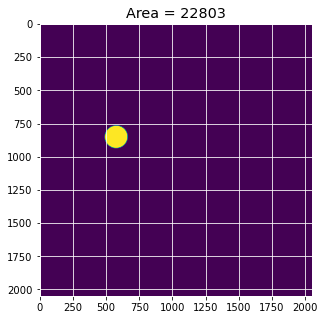

MicroStructure Number,  1730
theta =  -20.252868820254434
l/b =  1.0125664270509718
time for  103  =  23.56766438484192
----------------------------------------------------------------------------


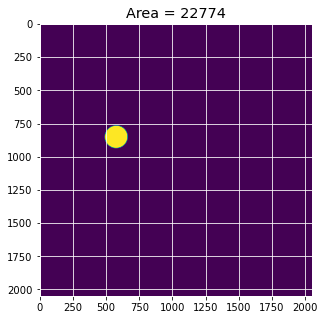

MicroStructure Number,  1740
theta =  -22.31367536180738
l/b =  1.0129360638151388
time for  104  =  23.13032817840576
----------------------------------------------------------------------------


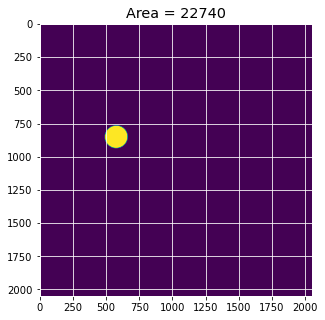

MicroStructure Number,  1750
theta =  -23.814936757756026
l/b =  1.0120183190164103
time for  105  =  23.602777242660522
----------------------------------------------------------------------------


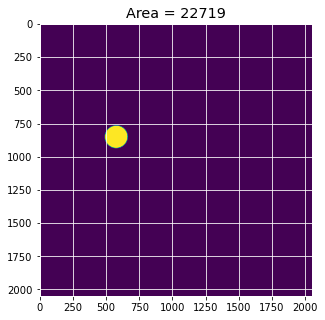

MicroStructure Number,  1760
theta =  -22.285062434054776
l/b =  1.0132711924949056
time for  106  =  25.315433502197266
----------------------------------------------------------------------------


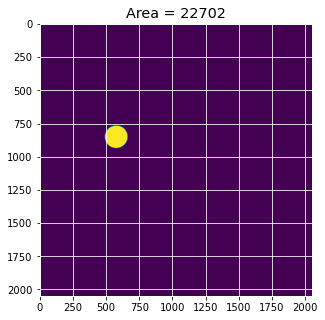

MicroStructure Number,  1770
theta =  -23.442501859991573
l/b =  1.0141911839323174
time for  107  =  24.569947719573975
----------------------------------------------------------------------------


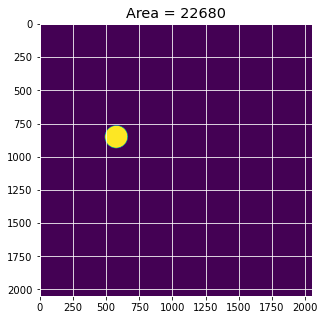

MicroStructure Number,  1780
theta =  -24.863797431023844
l/b =  1.0143321770347293
time for  108  =  23.567070484161377
----------------------------------------------------------------------------


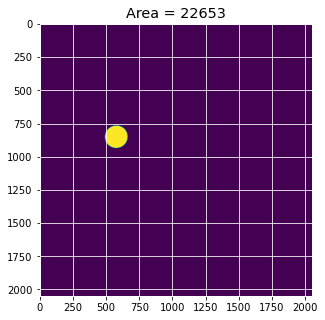

MicroStructure Number,  1790
theta =  -23.984076087268246
l/b =  1.0148036689081519
time for  109  =  23.37694764137268
----------------------------------------------------------------------------


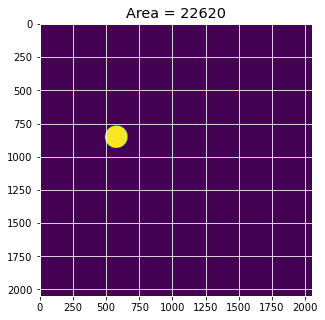

MicroStructure Number,  1800
theta =  -25.00622200032186
l/b =  1.0152407311842349
time for  110  =  23.200396299362183
----------------------------------------------------------------------------


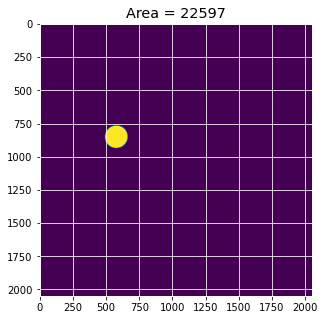

MicroStructure Number,  1810
theta =  -26.136083676192484
l/b =  1.0149981550278366
time for  111  =  23.508814096450806
----------------------------------------------------------------------------


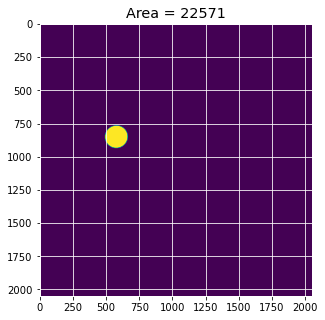

MicroStructure Number,  1820
theta =  -25.616410722781584
l/b =  1.015251974023496
time for  112  =  23.787621021270752
----------------------------------------------------------------------------


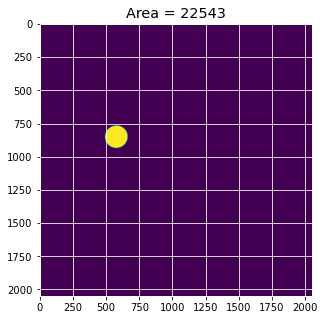

MicroStructure Number,  1830
theta =  -26.0572828253289
l/b =  1.0152342668392862
time for  113  =  23.343667030334473
----------------------------------------------------------------------------


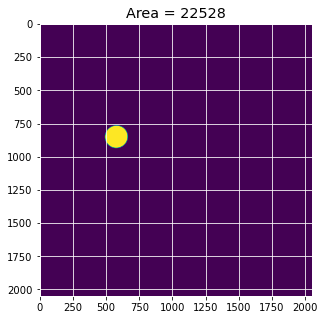

MicroStructure Number,  1840
theta =  -26.674984579166708
l/b =  1.0158231910452917
time for  114  =  23.142965078353882
----------------------------------------------------------------------------


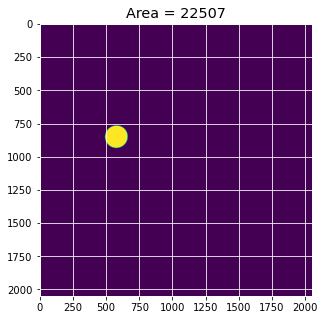

MicroStructure Number,  1850
theta =  -26.47445669574187
l/b =  1.0157309443298208
time for  115  =  23.83528184890747
----------------------------------------------------------------------------


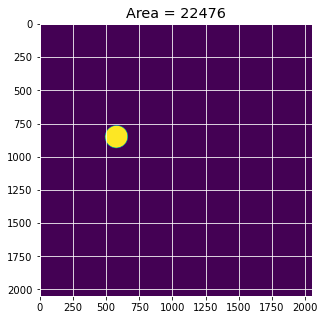

MicroStructure Number,  1860
theta =  -28.412164564070903
l/b =  1.0160235000130096
time for  116  =  23.731743097305298
----------------------------------------------------------------------------


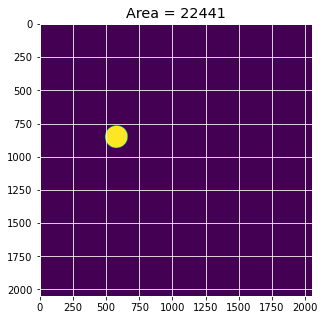

MicroStructure Number,  1870
theta =  -29.165461609147407
l/b =  1.0160183119241126
time for  117  =  23.480639219284058
----------------------------------------------------------------------------


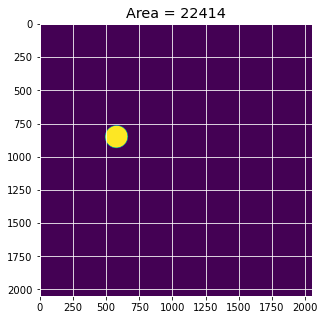

MicroStructure Number,  1880
theta =  -26.81465178892876
l/b =  1.0160455805072666
time for  118  =  23.76413893699646
----------------------------------------------------------------------------


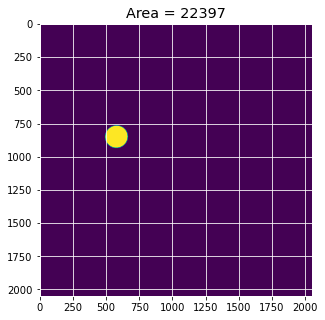

MicroStructure Number,  1890
theta =  -26.45793367207793
l/b =  1.016815001669734
time for  119  =  23.065498113632202
----------------------------------------------------------------------------


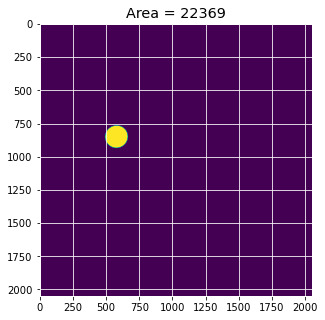

MicroStructure Number,  1900
theta =  -26.772022451679273
l/b =  1.0168158492444364
time for  120  =  22.842936992645264
----------------------------------------------------------------------------


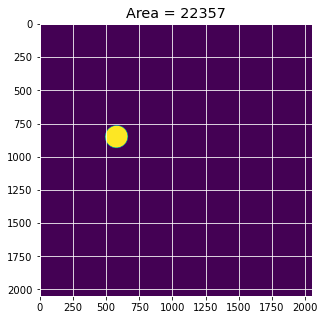

MicroStructure Number,  1910
theta =  -27.789888159795762
l/b =  1.0171244859536501
time for  121  =  23.29420781135559
----------------------------------------------------------------------------


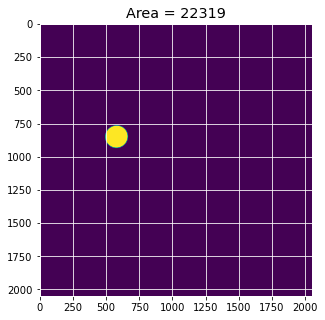

MicroStructure Number,  1920
theta =  -29.097872445405653
l/b =  1.0172585318510055
time for  122  =  25.32648992538452
----------------------------------------------------------------------------


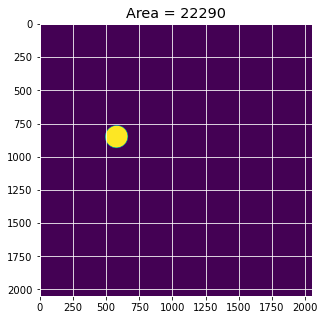

MicroStructure Number,  1930
theta =  -29.65151051540051
l/b =  1.0176463916935625
time for  123  =  23.530646085739136
----------------------------------------------------------------------------


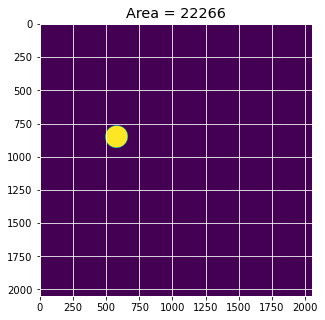

MicroStructure Number,  1940
theta =  -28.590039879184825
l/b =  1.0178931592650944
time for  124  =  23.643904447555542
----------------------------------------------------------------------------


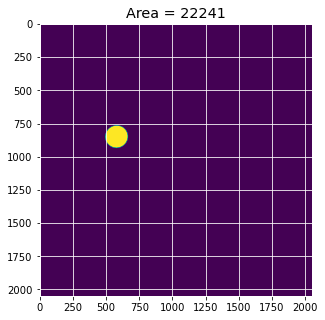

MicroStructure Number,  1950
theta =  -29.433848824316883
l/b =  1.0171304294853527
time for  125  =  23.60345697402954
----------------------------------------------------------------------------


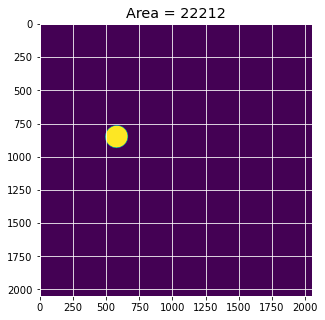

MicroStructure Number,  1960
theta =  -29.029456157850717
l/b =  1.0176536333143866
time for  126  =  23.078019618988037
----------------------------------------------------------------------------


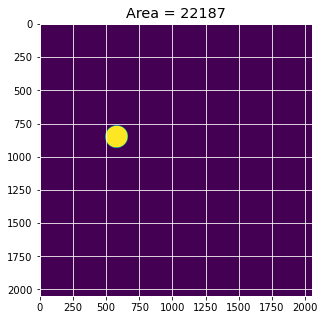

MicroStructure Number,  1970
theta =  -28.792945585333914
l/b =  1.0179651976751733
time for  127  =  23.782215118408203
----------------------------------------------------------------------------


In [19]:
# define cog here
area = []
cog1 = []
cog2 =[]
theta_array = []
l_array =[]
b_array = []
eig_array =[]
numberOfPpts = []
for i in range(128):
    start = time.time()
    img_track1 = corr.dat_to_numpy(list_files[700+i*10])
    img_track1 = vel.gaussian_filter(img_track1,4)
    img_track1 = (img_track1>0.5)*1
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    numberOfPpts.append(np.max(labels_track1))
    label_for_our_ppt = labels_track1[cog[0]][cog[1]]
    if(label_for_our_ppt==0):
        print('the microstructure dissapeared, or moved very quickly')
        break
        
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    cog = hosh.precipitateCentres(image_tracked1_binary,1)
    theta, l, b, eig = hosh.findAngleMajorMinorEigenvector(image_tracked1_binary,1)
    aa = np.sum(image_tracked1_binary)
    
    area.append(aa)
    cog1.append(cog[0])
    cog2.append(cog[1])
    theta_array.append(theta)
    l_array.append(l)
    b_array.append(b)
    eig_array.append(eig)
    
    plt.imshow(image_tracked1_binary)
    plt.title('Area = '+str(aa))
    plt.show()
    print('MicroStructure Number, ',700+i*10)
    print('theta = ',theta)
    print('l/b = ',l/b)
    print('time for ',i,' = ',time.time()-start)
    
    print('----------------------------------------------------------------------------')
    


In [20]:
df = pd.DataFrame()
df['area'] = area
df['cog1'] = cog1
df['cog2'] = cog2
df['theta_array'] =theta_array 
df['l_array'] = l_array
df['b_array'] = b_array
df['eig_array'] = eig_array
df['numberOfPpts'] = numberOfPpts
df.to_pickle('Everything_for_circular_spinodal_trial_2_directional_growth.pkl')
np.save('Everything_for_circular_spinodal_trial_2_directional_growth_eig.npy',eig_array)

True

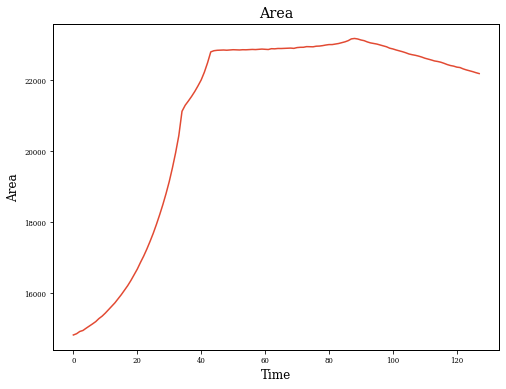

In [30]:
x = []
i = 0
for j in area:
    x.append(i)
    i = i+1
plots.plotFromData(x,area,title='Area', xlabel="Time", ylabel='Area')

True

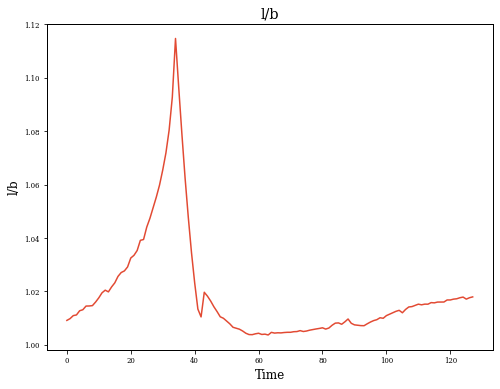

In [31]:
x = []
i = 0
lb = np.array(l_array)/np.array(b_array)
for j in lb:
    x.append(i)
    i = i+1
plots.plotFromData(x,lb,title='l/b' ,xlabel="Time", ylabel='l/b')

Text(0, 0.5, 'ratio l/b')

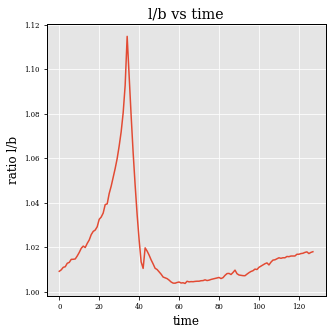

In [29]:
plt.plot(np.array(l_array)/np.array(b_array))
plt.title('l/b vs time')
plt.xlabel('time')
plt.ylabel('ratio l/b')

Text(0, 0.5, 'dA/dt in pixels per time frame')

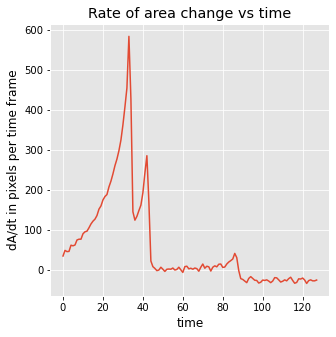

In [58]:
plt.plot(np.gradient(np.array(area)))
plt.title('Rate of area change vs time')
plt.xlabel('time')
plt.ylabel('dA/dt in pixels per time frame')

True

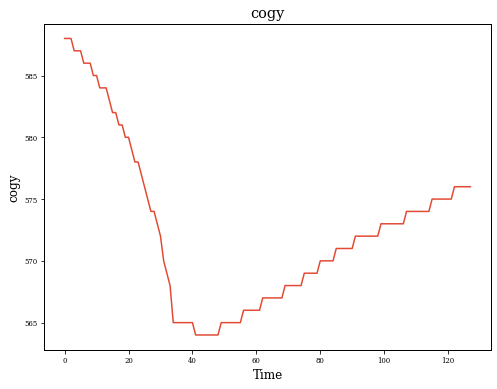

In [35]:
x = []
i = 0
for j in cog1:
    x.append(i)
    i = i+1
plots.plotFromData(x,cog2,title='cogy' ,xlabel="Time", ylabel='cogy')